<a href="https://colab.research.google.com/github/DeepaDolly/HR-Salary-prediction-with-python-flask/blob/main/HR_Salary_Prediction__Deepa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR SALARY PREDICTION DASHBOARD**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Dataset.csv')

In [ ]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

#There is no null values in this data

#Visualizations

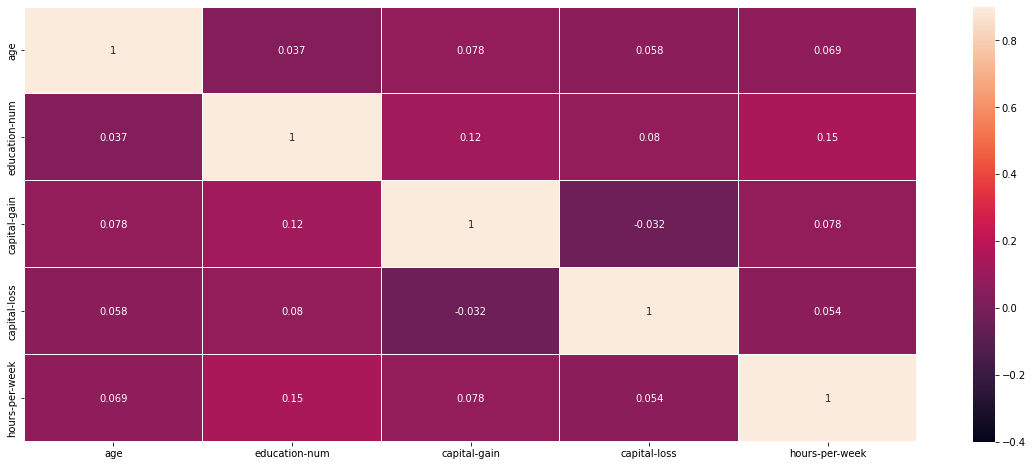

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize =(20,8))
sns.heatmap(corrmatrix, vmin =-.4,vmax=0.9,annot =True ,linewidth =.2)

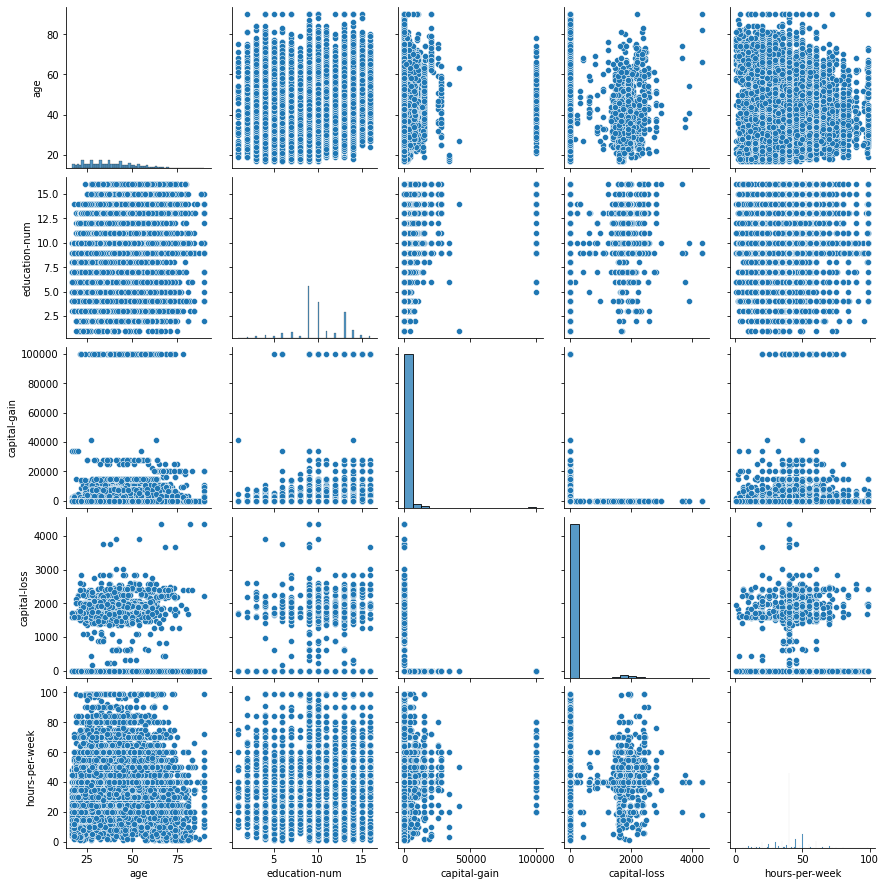

In [ ]:
sns.pairplot(data)

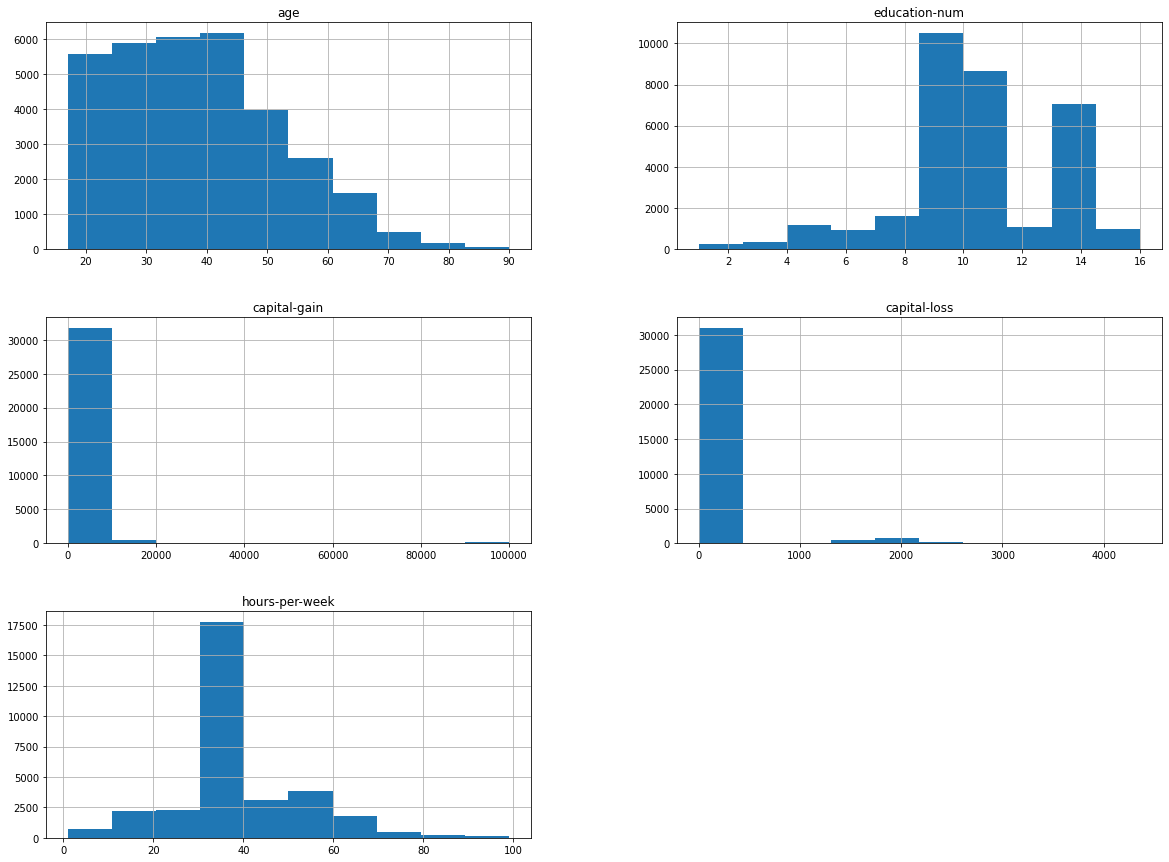

In [ ]:
data.hist(figsize=(20,15))
plt.show()

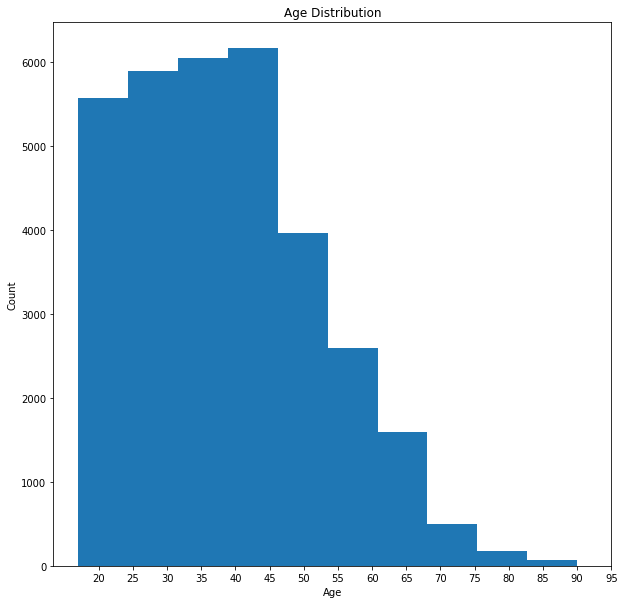

In [ ]:
#We can check the above using some representations like graphs, barplots, etc

#checking age

plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

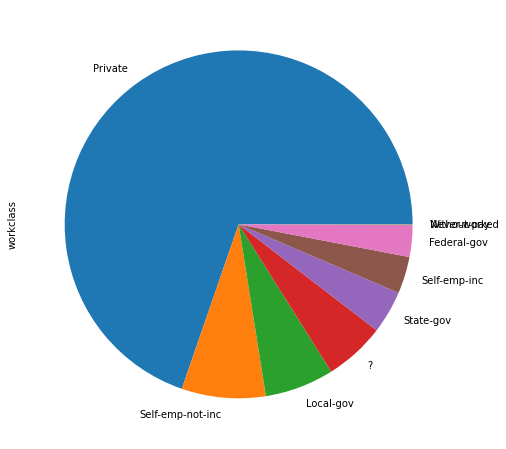

In [ ]:
#checking workclass

data['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

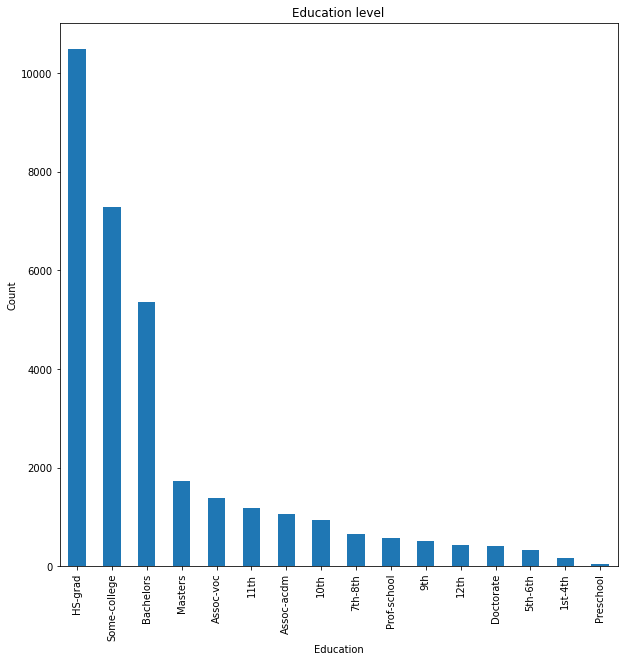

In [ ]:
#checking education

data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

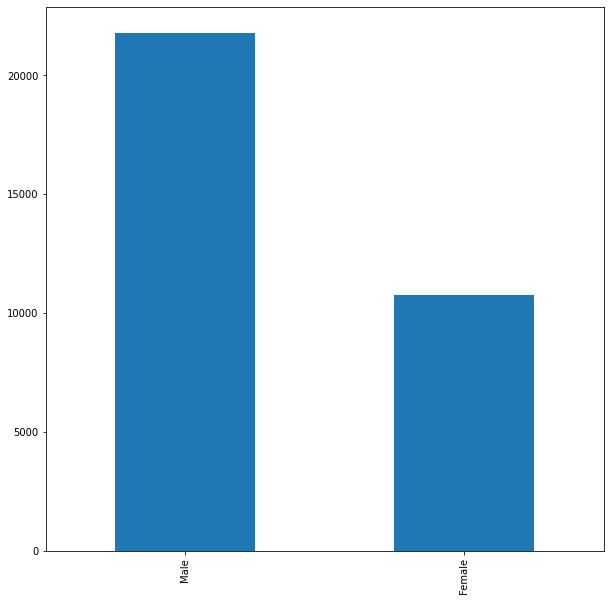

In [ ]:
#checking sex

data['sex'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

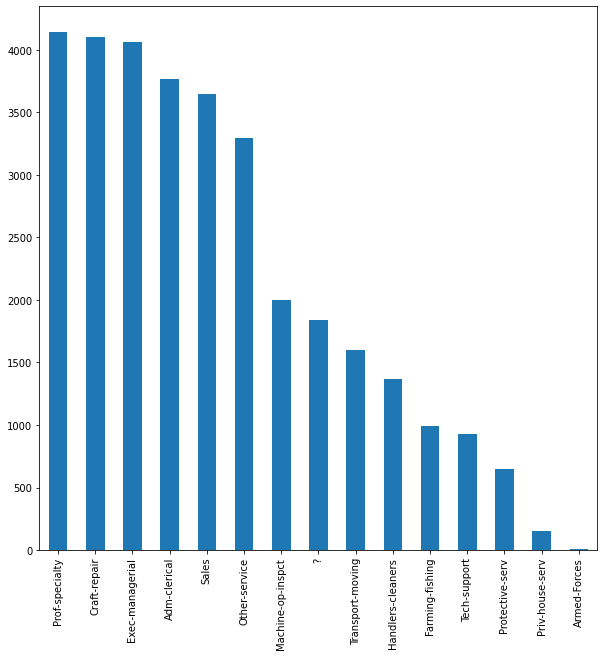

In [ ]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

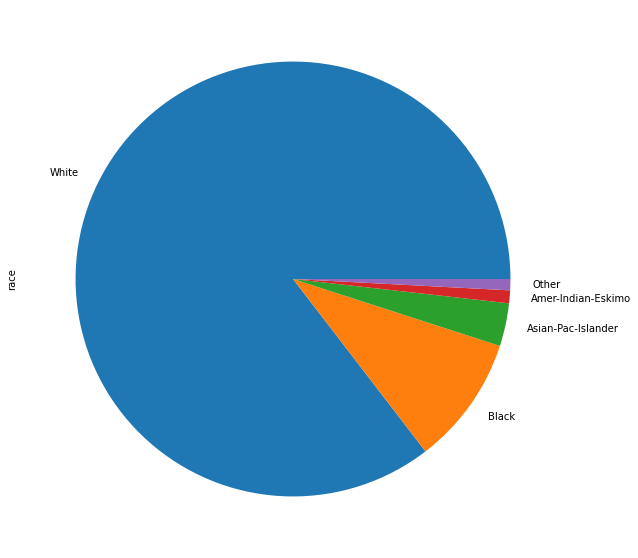

In [ ]:
#Checking race

data['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

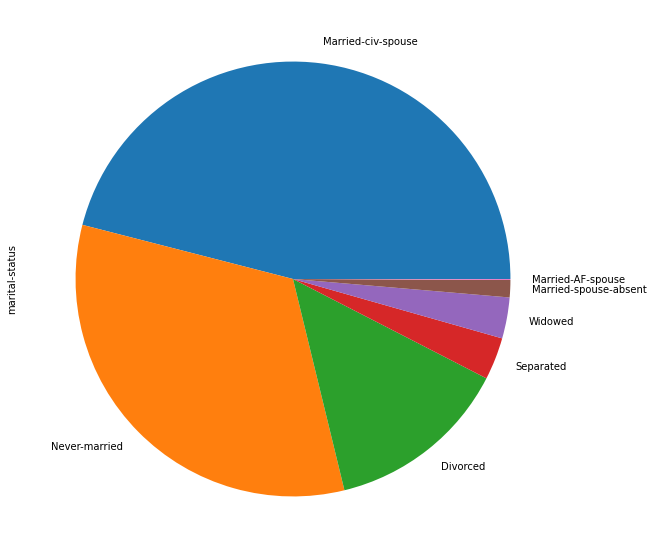

In [ ]:
#checking marital-status

data['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

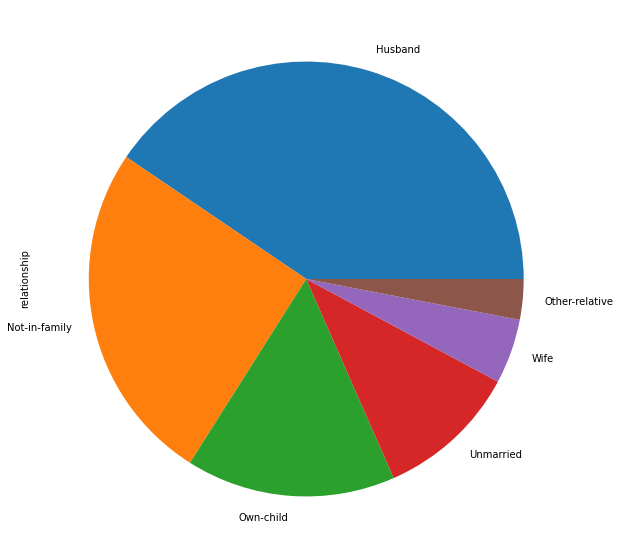

In [ ]:
#checking relationship

data['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

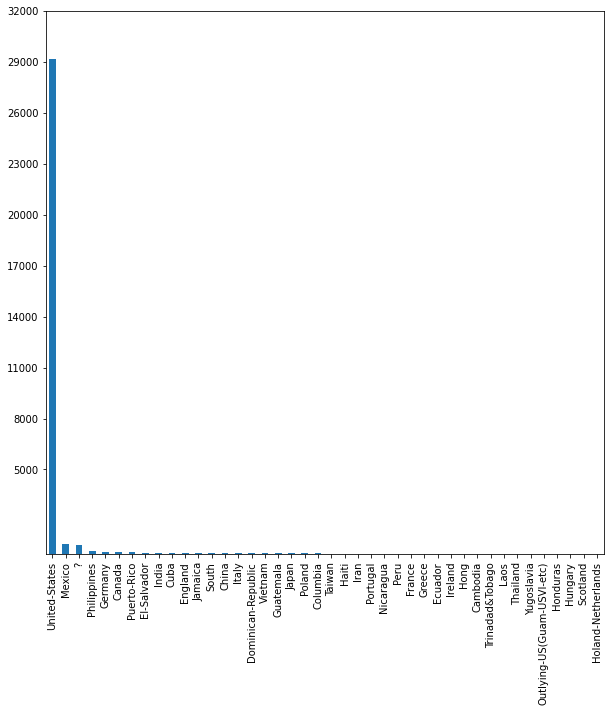

In [ ]:
#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

# **Data cleaning,to replace the "?" in the data**

# Age

In [ ]:
data[data['age']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# There is no "?" in age column

# Workclass

In [ ]:
data[data['workclass']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
data['workclass'].mode()

0    Private
dtype: object

In [ ]:
data['workclass'] = data['workclass'].replace('?','Private')

In [ ]:
data[data['workclass']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Education

In [ ]:
data[data['education']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# There is no "?" values in education

In [ ]:
data[data['education-num']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# There is no "?" values in education-num

# Marital Status

In [ ]:
data[data['marital-status']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# There is no "?" values in marital-status column

# Occupation

In [ ]:
data[data['occupation']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,Private,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Private,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,Private,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Private,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Private,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Private,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Private,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Private,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Private,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
data['occupation'].mode()

0    Prof-specialty
dtype: object

In [ ]:
data['occupation'] = data['occupation'].replace('?','Prof-specialty')

In [ ]:
data[data['occupation']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


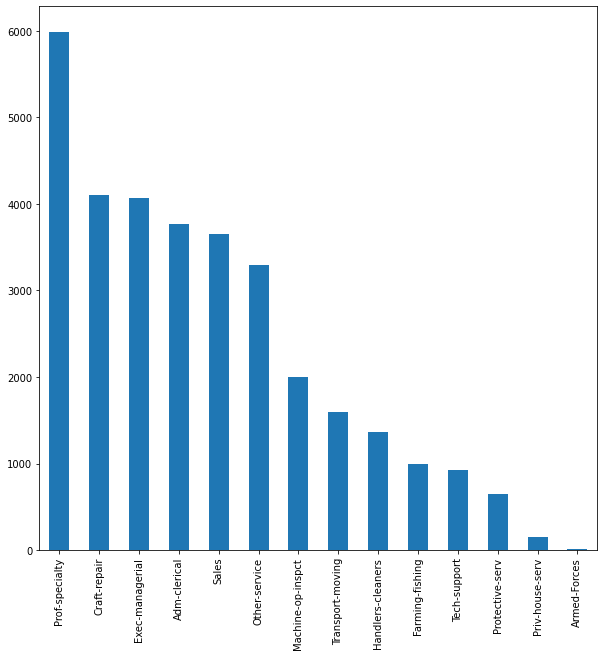

In [ ]:
#checking whether the records that contains
#the question mark '?' have being removed

#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

# Relationship, Race and Sex

In [ ]:
data[data['relationship']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [ ]:
data[data['race']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [ ]:
data[data['sex']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Native Country

In [ ]:
data[data['native-country']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,Private,7th-8th,4,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [ ]:
data['native-country'].mode()

0    United-States
dtype: object

In [ ]:
data['native-country'] = data['native-country'].replace('?','United-States')

# Salary, Capital Gain, Capital Loss and Hours per week

In [ ]:
data[data['salary']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [ ]:
data[data['capital-gain']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [ ]:
data[data['capital-loss']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [ ]:
data[data['hours-per-week']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# **Finding and removing Outliers**

# Age

Text(0.5, 1.0, 'Box plot of age')

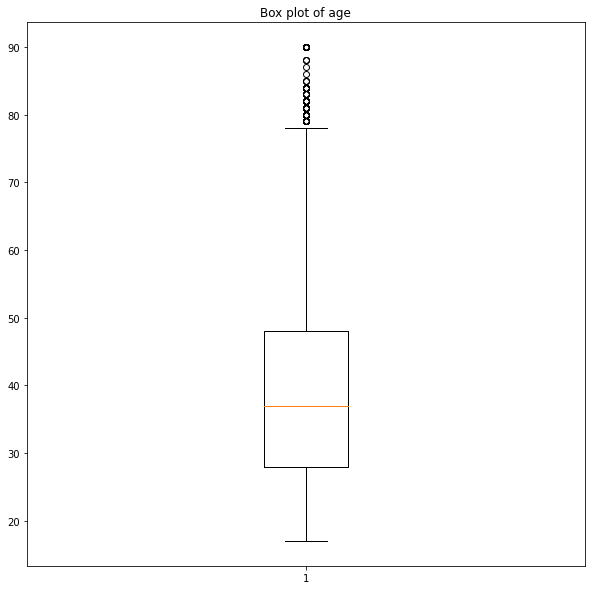

In [ ]:
plt.boxplot(data['age'])
plt.title("Box plot of age")

In [ ]:
q1=np.percentile(data['age'],25,interpolation='midpoint')
q2=np.percentile(data['age'],50,interpolation='midpoint')
q3=np.percentile(data['age'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

28.0
37.0
48.0


In [ ]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

-2.0
78.0


In [ ]:
outlier=[]
for x in data['age']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[79,
 90,
 80,
 81,
 90,
 88,
 90,
 90,
 80,
 90,
 81,
 82,
 79,
 81,
 80,
 83,
 90,
 90,
 79,
 81,
 90,
 90,
 80,
 90,
 90,
 79,
 79,
 84,
 90,
 80,
 90,
 81,
 83,
 84,
 81,
 79,
 85,
 82,
 79,
 80,
 90,
 90,
 90,
 84,
 80,
 90,
 90,
 79,
 84,
 90,
 79,
 90,
 90,
 90,
 82,
 81,
 90,
 84,
 79,
 81,
 82,
 81,
 80,
 90,
 80,
 84,
 82,
 79,
 90,
 84,
 90,
 83,
 79,
 81,
 80,
 79,
 80,
 79,
 80,
 90,
 90,
 80,
 90,
 90,
 81,
 83,
 82,
 90,
 90,
 81,
 80,
 80,
 90,
 79,
 80,
 82,
 85,
 80,
 79,
 90,
 81,
 79,
 80,
 79,
 81,
 82,
 88,
 90,
 82,
 88,
 84,
 83,
 79,
 86,
 90,
 90,
 82,
 83,
 81,
 79,
 90,
 80,
 81,
 79,
 84,
 84,
 79,
 90,
 80,
 81,
 81,
 81,
 90,
 87,
 90,
 80,
 80,
 82,
 90,
 90,
 85,
 82,
 81]

In [ ]:
Ind1 = data['age']>u_lim
location=data.loc[Ind1].index

In [ ]:
data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of age')

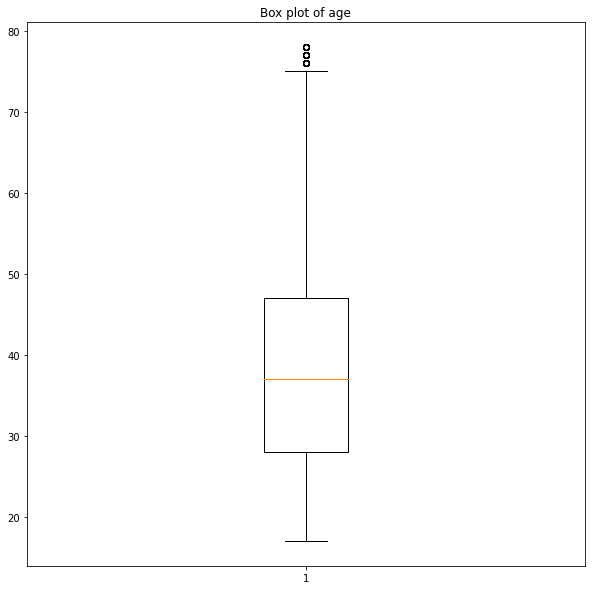

In [ ]:
plt.boxplot(data['age'])
plt.title("Box plot of age")

# Education-Num

Text(0.5, 1.0, 'Box plot of education-num')

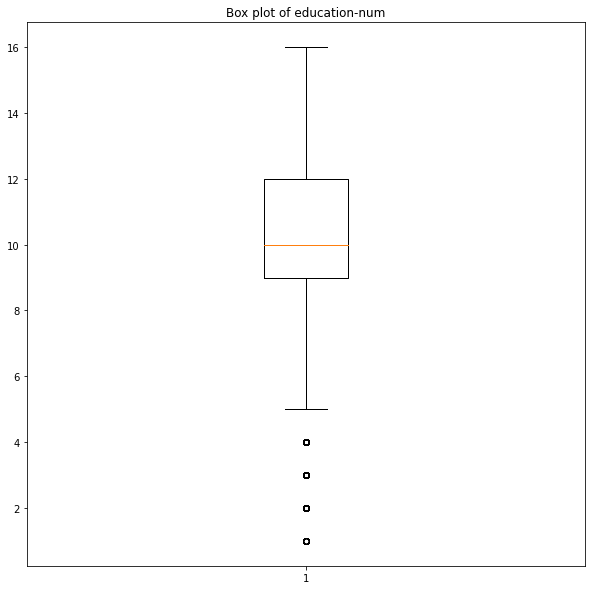

In [ ]:
plt.boxplot(data['education-num'])
plt.title("Box plot of education-num")

In [ ]:
q1=np.percentile(data['education-num'],25,interpolation='midpoint')
q2=np.percentile(data['education-num'],50,interpolation='midpoint')
q3=np.percentile(data['education-num'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

9.0
10.0
12.0


In [ ]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

4.5
16.5


In [ ]:
outlier=[]
for x in data['education-num']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[4,
 3,
 4,
 4,
 2,
 4,
 3,
 4,
 2,
 1,
 4,
 4,
 3,
 3,
 3,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 2,
 1,
 4,
 4,
 4,
 4,
 2,
 2,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 2,
 2,
 3,
 3,
 4,
 3,
 2,
 4,
 4,
 3,
 3,
 2,
 2,
 4,
 3,
 4,
 1,
 4,
 1,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 2,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 2,
 4,
 3,
 2,
 2,
 4,
 4,
 2,
 2,
 4,
 4,
 2,
 2,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 4,
 1,
 4,
 4,
 2,
 4,
 2,


In [ ]:
Ind1 = data['education-num']<l_lim
location=data.loc[Ind1].index

In [ ]:
data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of education-num')

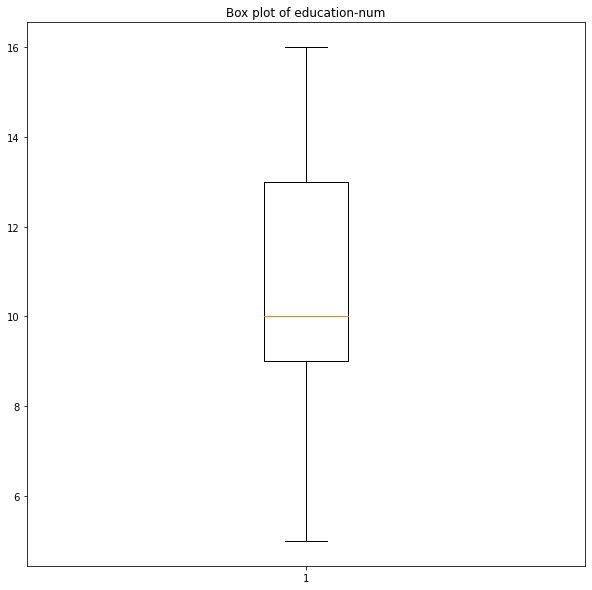

In [ ]:
plt.boxplot(data['education-num'])
plt.title("Box plot of education-num")

# Capiltal Gain

Text(0.5, 1.0, 'Box plot of capital-gain')

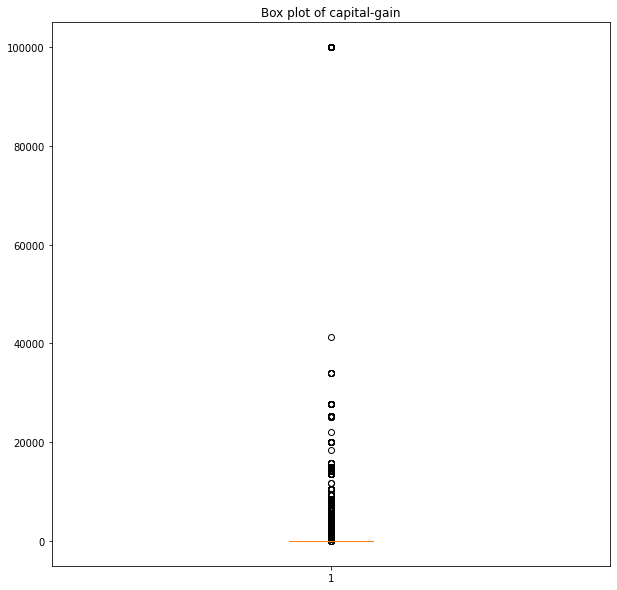

In [ ]:
plt.boxplot(data['capital-gain'])
plt.title("Box plot of capital-gain")

In [ ]:
q1=np.percentile(data['capital-gain'],25,interpolation='midpoint')
q2=np.percentile(data['capital-gain'],50,interpolation='midpoint')
q3=np.percentile(data['capital-gain'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

0.0
0.0
0.0


In [ ]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

0.0
0.0


In [ ]:
outlier=[]
for x in data['capital-gain']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[2174,
 14084,
 5178,
 5013,
 2407,
 14344,
 15024,
 7688,
 34095,
 4064,
 4386,
 14084,
 7298,
 7298,
 15024,
 1409,
 3674,
 4064,
 1055,
 2407,
 7298,
 7298,
 5178,
 15024,
 3464,
 7688,
 4386,
 7298,
 2050,
 7298,
 7298,
 7688,
 15024,
 2176,
 2174,
 594,
 594,
 15024,
 15024,
 7688,
 20051,
 5013,
 7688,
 2174,
 6849,
 1055,
 15024,
 15024,
 15024,
 5178,
 4101,
 1111,
 8614,
 3411,
 2597,
 25236,
 4386,
 4650,
 7298,
 9386,
 2407,
 594,
 14084,
 7688,
 7688,
 1055,
 2463,
 5178,
 3103,
 4386,
 4386,
 10605,
 2174,
 7688,
 15024,
 3103,
 4101,
 2964,
 3325,
 2580,
 15024,
 15024,
 3103,
 1409,
 7688,
 7298,
 3471,
 7298,
 3103,
 4865,
 15024,
 7298,
 3411,
 10605,
 4386,
 5178,
 15024,
 7688,
 4650,
 99999,
 15024,
 6514,
 5178,
 15024,
 7298,
 1471,
 3674,
 2329,
 7688,
 99999,
 20051,
 5013,
 2105,
 4386,
 3411,
 594,
 5013,
 1055,
 3325,
 7688,
 7298,
 99999,
 2105,
 15024,
 3325,
 15024,
 15024,
 2885,
 99999,
 7688,
 25124,
 2176,
 10520,
 1055,
 15024,
 99999,
 15024,
 2407,


In [ ]:
Ind1 = data['capital-gain']<l_lim
location=data.loc[Ind1].index

In [ ]:
data.drop(location,inplace=True)

# Capital Loss

Text(0.5, 1.0, 'Box plot of capital-loss')

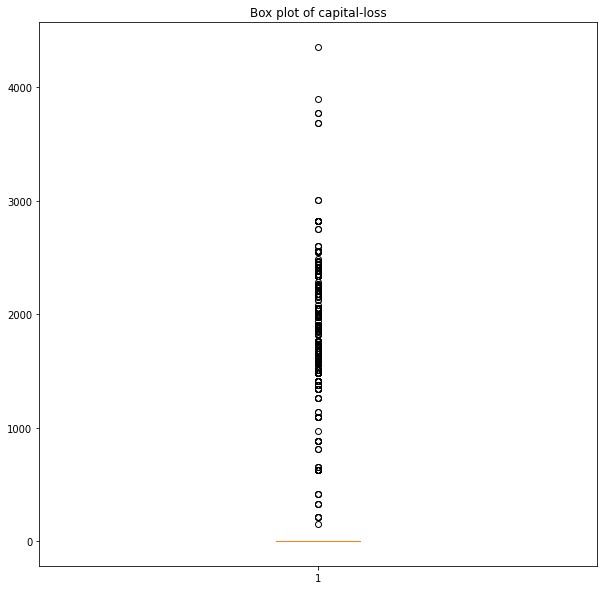

In [ ]:
plt.boxplot(data['capital-loss'])
plt.title("Box plot of capital-loss")

In [ ]:
q1=np.percentile(data['capital-loss'],25,interpolation='midpoint')
q2=np.percentile(data['capital-loss'],50,interpolation='midpoint')
q3=np.percentile(data['capital-loss'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

0.0
0.0
0.0


In [ ]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

0.0
0.0


In [ ]:
outlier=[]
for x in data['capital-gain']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[2174,
 14084,
 5178,
 5013,
 2407,
 14344,
 15024,
 7688,
 34095,
 4064,
 4386,
 14084,
 7298,
 7298,
 15024,
 1409,
 3674,
 4064,
 1055,
 2407,
 7298,
 7298,
 5178,
 15024,
 3464,
 7688,
 4386,
 7298,
 2050,
 7298,
 7298,
 7688,
 15024,
 2176,
 2174,
 594,
 594,
 15024,
 15024,
 7688,
 20051,
 5013,
 7688,
 2174,
 6849,
 1055,
 15024,
 15024,
 15024,
 5178,
 4101,
 1111,
 8614,
 3411,
 2597,
 25236,
 4386,
 4650,
 7298,
 9386,
 2407,
 594,
 14084,
 7688,
 7688,
 1055,
 2463,
 5178,
 3103,
 4386,
 4386,
 10605,
 2174,
 7688,
 15024,
 3103,
 4101,
 2964,
 3325,
 2580,
 15024,
 15024,
 3103,
 1409,
 7688,
 7298,
 3471,
 7298,
 3103,
 4865,
 15024,
 7298,
 3411,
 10605,
 4386,
 5178,
 15024,
 7688,
 4650,
 99999,
 15024,
 6514,
 5178,
 15024,
 7298,
 1471,
 3674,
 2329,
 7688,
 99999,
 20051,
 5013,
 2105,
 4386,
 3411,
 594,
 5013,
 1055,
 3325,
 7688,
 7298,
 99999,
 2105,
 15024,
 3325,
 15024,
 15024,
 2885,
 99999,
 7688,
 25124,
 2176,
 10520,
 1055,
 15024,
 99999,
 15024,
 2407,


In [ ]:
Ind1 = data['capital-loss']>u_lim
location=data.loc[Ind1].index

In [ ]:
data.drop(location,inplace=True)

# Hours-per-week

Text(0.5, 1.0, 'Box plot of hours-per-week')

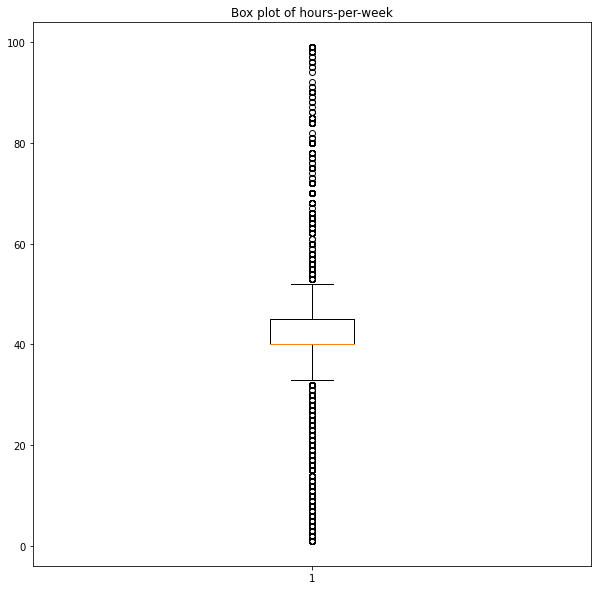

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.title("Box plot of hours-per-week")

In [ ]:
q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

40.0
40.0
45.0


In [ ]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

32.5
52.5


In [ ]:
outlier=[]
for x in data['hours-per-week']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[13,
 16,
 80,
 30,
 60,
 20,
 60,
 80,
 15,
 25,
 30,
 55,
 60,
 58,
 32,
 70,
 2,
 22,
 30,
 25,
 60,
 32,
 25,
 56,
 60,
 60,
 60,
 20,
 30,
 30,
 24,
 24,
 60,
 16,
 20,
 25,
 12,
 65,
 1,
 28,
 24,
 55,
 60,
 12,
 60,
 55,
 20,
 10,
 20,
 55,
 70,
 20,
 20,
 30,
 20,
 30,
 60,
 12,
 75,
 24,
 24,
 98,
 15,
 60,
 56,
 16,
 60,
 80,
 25,
 54,
 25,
 15,
 24,
 10,
 15,
 55,
 60,
 30,
 20,
 8,
 25,
 25,
 30,
 24,
 55,
 15,
 15,
 10,
 10,
 30,
 25,
 16,
 55,
 64,
 25,
 24,
 60,
 19,
 30,
 18,
 60,
 72,
 25,
 60,
 28,
 5,
 55,
 60,
 20,
 60,
 16,
 60,
 24,
 6,
 30,
 20,
 20,
 20,
 60,
 60,
 25,
 20,
 20,
 8,
 20,
 24,
 80,
 58,
 9,
 8,
 20,
 32,
 55,
 60,
 12,
 70,
 25,
 30,
 24,
 60,
 80,
 25,
 28,
 21,
 60,
 20,
 60,
 32,
 55,
 20,
 20,
 24,
 55,
 60,
 64,
 26,
 60,
 60,
 14,
 60,
 60,
 55,
 15,
 20,
 32,
 15,
 60,
 25,
 20,
 10,
 16,
 5,
 55,
 30,
 20,
 20,
 60,
 20,
 30,
 65,
 25,
 15,
 20,
 59,
 24,
 15,
 20,
 25,
 72,
 20,
 20,
 18,
 70,
 55,
 30,
 55,
 24,
 56,
 60,
 55,
 30,
 16,

In [ ]:
Ind1 = data['hours-per-week']<l_lim
location=data.loc[Ind1].index

In [ ]:
data.drop(location,inplace=True)

In [ ]:
Ind1 = data['hours-per-week']>u_lim
location=data.loc[Ind1].index

In [ ]:
data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of hours-per-week')

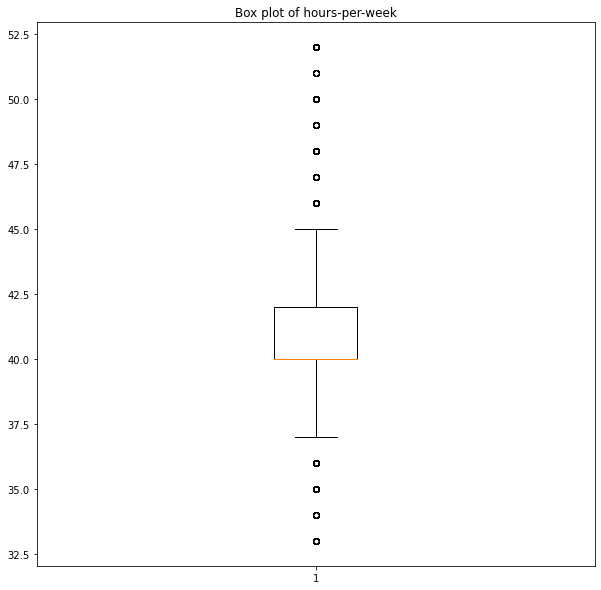

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.title("Box plot of hours-per-week")

# **MODEL SELECTION**

# Label Encoding

In [ ]:
from sklearn import preprocessing 
label= preprocessing.LabelEncoder()  
data['workclass']=label.fit_transform(data['workclass'])
data['education']=label.fit_transform(data['education'])
data['occupation']=label.fit_transform(data['occupation'])
data['sex']=label.fit_transform(data['sex'])
data['salary']=label.fit_transform(data['salary'])
data['race']=label.fit_transform(data['race'])
data['native-country']=label.fit_transform(data['native-country'])
data['marital-status']=label.fit_transform(data['marital-status'])
data['relationship']=label.fit_transform(data['relationship'])

In [ ]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,6,13,4,0,1,4,1,2174,0,40,37,0
2,38,3,8,9,0,5,1,4,1,0,0,40,37,0
3,53,3,1,7,2,5,0,2,1,0,0,40,37,0
4,28,3,6,13,2,9,5,2,0,0,0,40,4,0
5,37,3,9,14,2,3,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,11,10,4,10,1,4,1,0,0,40,37,0
32556,27,3,4,12,2,12,5,4,0,0,0,38,37,0
32557,40,3,8,9,2,6,0,4,1,0,0,40,37,1
32558,58,3,8,9,6,0,4,4,0,0,0,40,37,0


In [ ]:
y=data['salary']

In [ ]:
x=data.drop(['salary',],axis=1)

In [ ]:
x

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,6,13,4,0,1,4,1,2174,0,40,37
2,38,3,8,9,0,5,1,4,1,0,0,40,37
3,53,3,1,7,2,5,0,2,1,0,0,40,37
4,28,3,6,13,2,9,5,2,0,0,0,40,4
5,37,3,9,14,2,3,5,4,0,0,0,40,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,11,10,4,10,1,4,1,0,0,40,37
32556,27,3,4,12,2,12,5,4,0,0,0,38,37
32557,40,3,8,9,2,6,0,4,1,0,0,40,37
32558,58,3,8,9,6,0,4,4,0,0,0,40,37


# **MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [ ]:
acc_values

[0.8263389751912822,
 0.8263389751912822,
 0.8284256897750986,
 0.8261071180153026,
 0.8261071180153026,
 0.8261071180153026,
 0.8254115464873638,
 0.8251796893113842,
 0.8256434036633434,
 0.8254115464873638,
 0.8237885462555066,
 0.8242522606074658,
 0.8237885462555066,
 0.824715974959425,
 0.8242522606074658,
 0.8256434036633434,
 0.8237885462555066,
 0.8217018316716902,
 0.8237885462555066,
 0.8200788314398331]

Text(0, 0.5, 'accuracy')

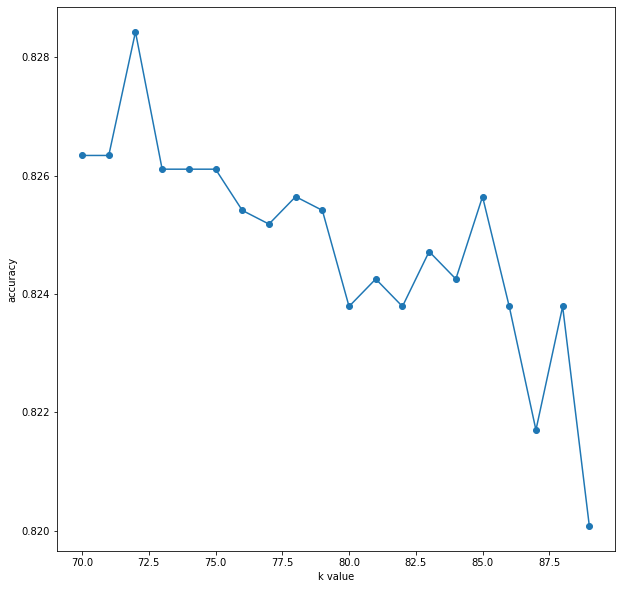

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=72, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

# Standard Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Min-Max Scaling

In [ ]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

# Normalization

In [ ]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [ ]:
x=preprocessing.normalize(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
ac_lr=accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3243
           1       0.60      0.27      0.37      1070

    accuracy                           0.77      4313
   macro avg       0.70      0.60      0.62      4313
weighted avg       0.75      0.77      0.74      4313



# KNN

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=72, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
ac_knn=accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88      3243
           1       0.69      0.49      0.57      1070

    accuracy                           0.82      4313
   macro avg       0.77      0.71      0.73      4313
weighted avg       0.81      0.82      0.81      4313



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
ac_dt=accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3243
           1       0.60      0.57      0.58      1070

    accuracy                           0.80      4313
   macro avg       0.73      0.72      0.73      4313
weighted avg       0.80      0.80      0.80      4313



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)
ac_rf=accuracy_score(y_test,y_predict)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3243
           1       0.70      0.58      0.64      1070

    accuracy                           0.84      4313
   macro avg       0.79      0.75      0.77      4313
weighted avg       0.83      0.84      0.83      4313



# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3243
           1       0.77      0.58      0.66      1070

    accuracy                           0.85      4313
   macro avg       0.82      0.76      0.78      4313
weighted avg       0.85      0.85      0.85      4313



# **SELECTED MODEL - GRADIENT BOOSTING CLASSIFIER**

In [ ]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Hyper Parameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 250}, 0.8551884057971014)

In [ ]:
parameter2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1750, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameter2, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

({'max_depth': 5}, 0.8565797101449277)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
ac_gb=accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print("The accuracy of Logistic Regression is:",ac_lr*100)
print("The accuracy of KNN is:",ac_knn*100)
print("The accuracy of Decision tree is:",ac_dt*100)
print("The accuracy of Random forest  is:",ac_rf*100)
print("The accuracy of Gradient boost is:",ac_gb*100)

The accuracy of Logistic Regression is: 77.32436818919545
The accuracy of KNN is: 81.7296545328078
The accuracy of Decision tree is: 79.75886853698123
The accuracy of Random forest  is: 83.53814050544864
The accuracy of Gradient boost is: 86.36679805239972


In [ ]:
from tabulate import tabulate

In [ ]:
table = [['Model', 'Accuracy'], ['Logistic Regression',ac_lr], ['KNN',ac_knn],['Decision tree',ac_dt],['Random Forest',ac_rf],['Gradient Boost',ac_gb]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │   0.773244 │
├─────────────────────┼────────────┤
│ KNN                 │   0.828426 │
├─────────────────────┼────────────┤
│ Decision tree       │   0.797589 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.835381 │
├─────────────────────┼────────────┤
│ Gradient Boost      │   0.863668 │
╘═════════════════════╧════════════╛


# **It can be inferred from the table summary that Gradient Boost model gives best accuracy of 86.36 % while model training**

# **Submitted by,**
# **Deepa D.**